1. Compute the historical means and covariance matrix of the S&P 500, Treasuries, and Corporates using Damodoran's data (see 11-markets_portfolios.ipynb for a url to download the data).  Print them and then convert them to numpy arrays before doing the following parts.

In [ ]:
import pandas as pd
df = pd.read_csv(
    'https://www.dropbox.com/s/hgwte6swx57jqcv/nominal_sbb.csv?dl=1',
    index_col="Year" 
)
df = df[["S&P 500", "Treasuries", "Corporates"]]
df.head(3)

,S&P 500,TBills,Treasuries,Corporates
Year,,,,
1928,0.438112,0.0308,0.008355,0.032196
1929,-0.082979,0.0316,0.042038,0.030179
1930,-0.251236,0.0455,0.045409,0.005398


In [12]:
mu = df.mean()
mu

S&P 500       0.118205
Treasuries    0.051104
Corporates    0.071861
dtype: float64

In [13]:
Sigma = df.cov()
Sigma

,S&P 500,Treasuries,Corporates
S&P 500,0.037871,-0.000348,0.005779
Treasuries,-0.000348,0.005898,0.003439
Corporates,0.005779,0.003439,0.005643


In [14]:
Sigma = Sigma.to_numpy()
mu = mu.to_numpy()

2. Compute the global minimum variance portfolio.

In [15]:
import numpy as np
from cvxopt import matrix
from cvxopt.solvers import qp

P = Sigma
q = np.zeros((3, 1))
A = np.ones((1, 3))
b = np.ones((1, 1))

sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
)

gmv = pd.Series(sol["x"], index=df.columns)
gmv

S&P 500       0.059949
Treasuries    0.523070
Corporates    0.416980
dtype: float64

3. Vary the target expected return on a grid from 4% to 12% and compute the minimum risk portfolio, allowing short sales but not using cash.  Calculate the mean and standard deviation of each portfolio and plot them.

In [17]:
P = Sigma
q = np.zeros((3, 1))
A = np.array(
    [
        mu,
        [1., 1., 1.]
    ]
)

means = []
stdevs = []
for r in np.arange(0, .121, 0.001):
    b = np.array([r, 1]).reshape(2, 1)
    sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
    )
    w = np.array(sol["x"]).reshape(3,)
    means.append(mu @ w)
    stdevs.append(np.sqrt(w @ Sigma @ w))

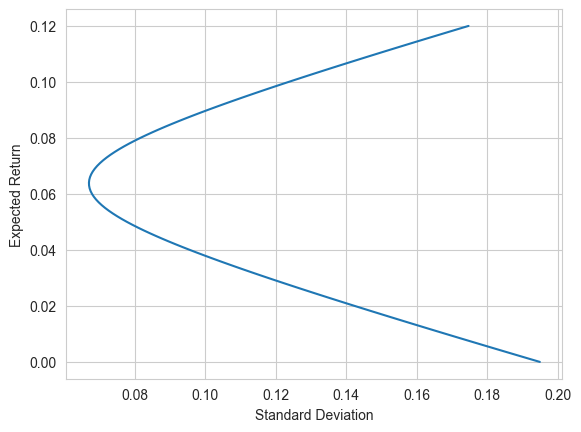

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.plot(stdevs, means)
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()

4.  Assume the risk-free rate is 3%.  What is the tangency portfolio, allowing short sales?

In [19]:
rf = 0.03
r = 0.06

P = Sigma
q = np.zeros((3, 1))
A = (mu - rf*np.ones(3)).reshape(1, 3)
b = np.array([r-rf]).reshape(1, 1)

sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
)
w = pd.Series(sol["x"], index=df.columns)
w = w / w.sum()
w

S&P 500       0.194152
Treasuries    0.043220
Corporates    0.762627
dtype: float64